In [106]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [107]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [108]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price' : sale_price, 'flat_area' : flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


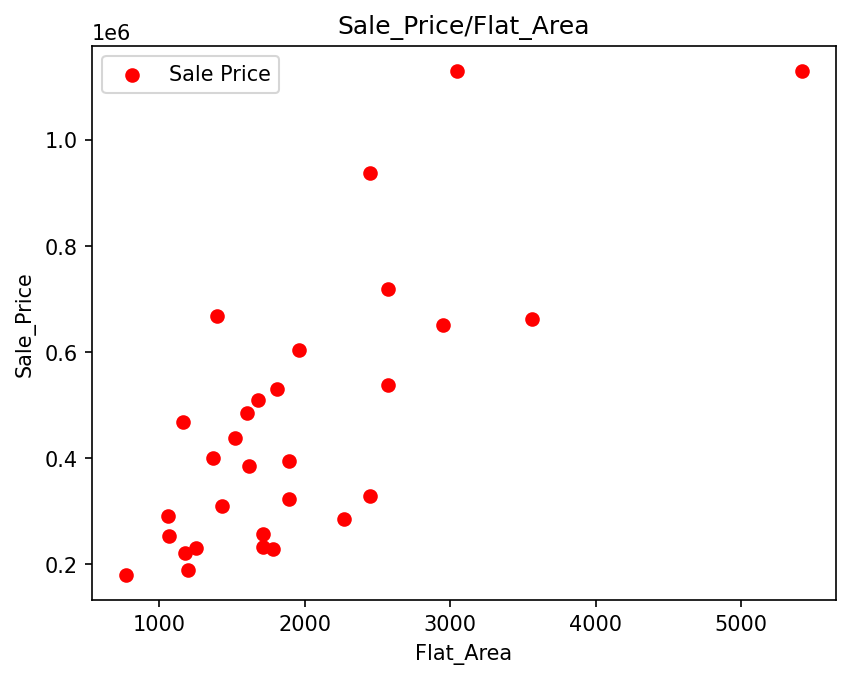

In [109]:
plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show()

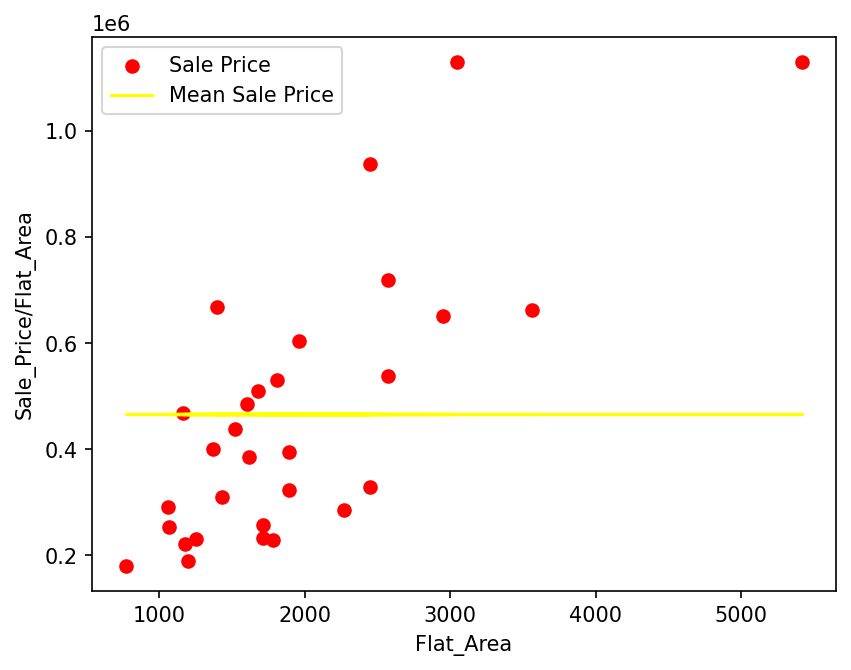

In [110]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'Sale Price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = 'yellow', label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price/Flat_Area')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

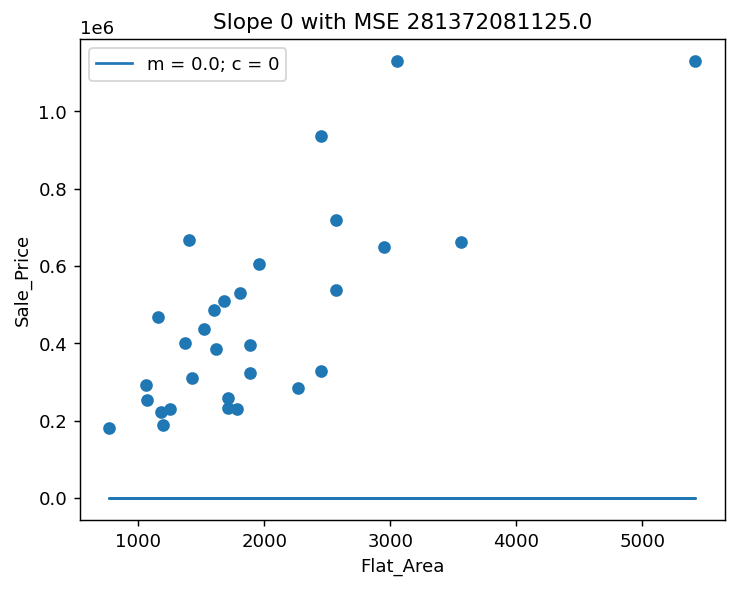

In [111]:
c = 0
m = 0
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope '+str(m)+' with MSE '+str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

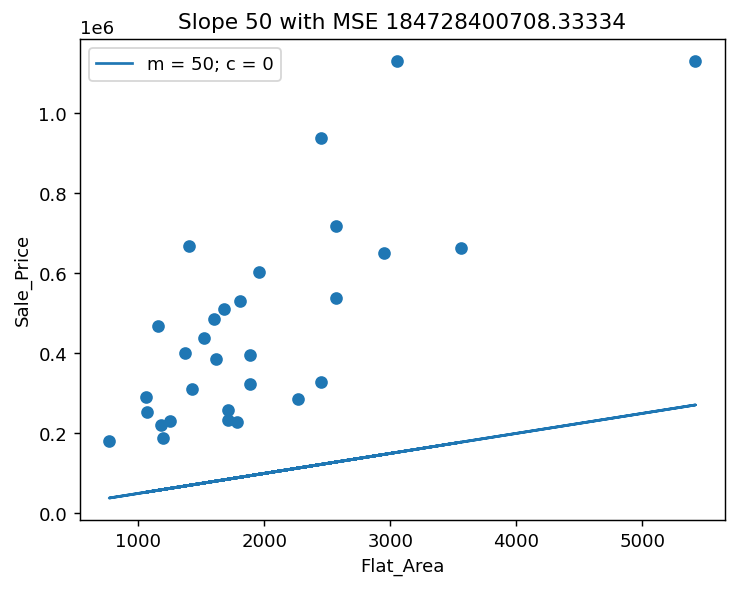

In [112]:
c = 0
m = 50
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope '+str(m)+' with MSE '+str(MSE))

In [113]:
def slope_error(slope, intercept, sample_data):
    Sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope + intercept
        Sale.append(tmp)
    MSE = mse(sample_data.sale_price, Sale)
    return MSE

In [114]:
slope = [i/10 for i in range(0, 5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [115]:
#Arranging in Dataframe
Cost_table = pd.DataFrame({
    'Slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,Slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


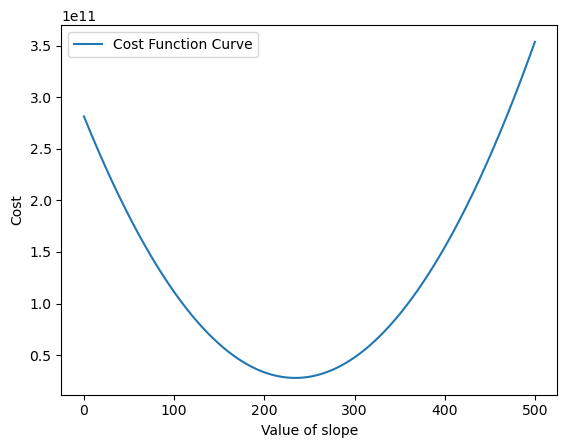

In [116]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.Slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [117]:
new_slope = Cost_table['Slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [118]:
def intercept_error(slope, intercept, sample_data):
    Sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope + intercept
        Sale.append(tmp)
    MSE = mse(sample_data.sale_price, Sale)
    return MSE

In [119]:
intercept = [i for i in range(5000, 50000)]

Cost = []
for i in intercept:
    cost = intercept_error(slope = 234.3, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [120]:
#Arranging in Dataframe
Cost_Table = pd.DataFrame({
    'Intercept' : intercept,
    'Cost' : Cost
})
Cost_Table.head()

,Intercept,Cost
0,5000,2.780450e+10
1,5001,2.780449e+10
2,5002,2.780448e+10
3,5003,2.780447e+10
4,5004,2.780446e+10


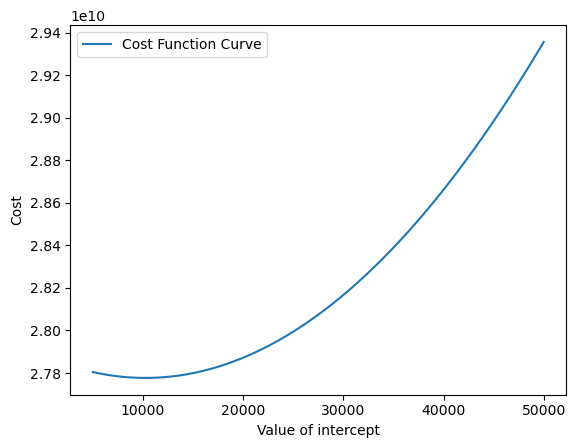

In [121]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_Table.Intercept, Cost_Table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [122]:
new_intercept = Cost_Table['Intercept'][Cost_Table['Cost'] == Cost_Table['Cost'].min()].values
new_intercept[0]

10251

In [123]:
slope = [i/10 for i in range(0, 5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 10251, sample_data = sample_data)
    Cost.append(cost)

In [124]:
#Arranging in Dataframe
Cost_table = pd.DataFrame({
    'Slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,Slope,Cost
4995,499.5,3.630749e+11
4996,499.6,3.633238e+11
4997,499.7,3.635728e+11
4998,499.8,3.638219e+11
4999,499.9,3.640712e+11


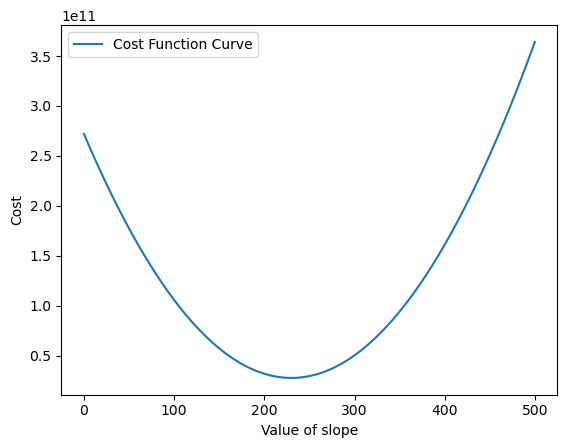

In [125]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.Slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [126]:
new_slope = Cost_table['Slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

230.0

In [127]:
intercept = [i for i in range(5000, 50000)]

Cost = []
for i in intercept:
    cost = intercept_error(slope = 230.0, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [128]:
#Arranging in Dataframe
Cost_Table = pd.DataFrame({
    'Intercept' : intercept,
    'Cost' : Cost
})
Cost_Table.head()

,Intercept,Cost
0,5000,2.780653e+10
1,5001,2.780650e+10
2,5002,2.780648e+10
3,5003,2.780645e+10
4,5004,2.780642e+10


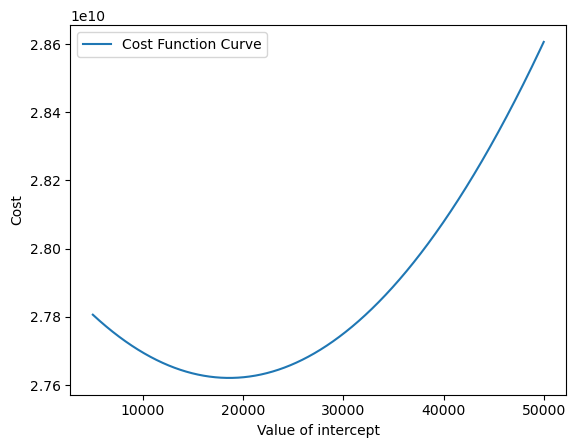

In [129]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_Table.Intercept, Cost_Table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [130]:
new_intercept = Cost_Table['Intercept'][Cost_Table['Cost'] == Cost_Table['Cost'].min()].values
new_intercept[0]

18615

In [131]:
slope = [i/10 for i in range(0, 5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 18615, sample_data = sample_data)
    Cost.append(cost)

In [132]:
#Arranging in Dataframe
Cost_table = pd.DataFrame({
    'Slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,Slope,Cost
4995,499.5,3.717741e+11
4996,499.6,3.720263e+11
4997,499.7,3.722786e+11
4998,499.8,3.725309e+11
4999,499.9,3.727834e+11


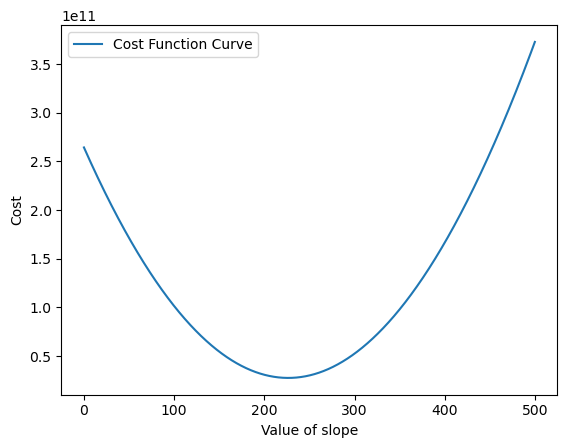

In [133]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.Slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [134]:
new_slope = Cost_table['Slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

226.5

In [135]:
intercept = [i for i in range(5000, 50000)]

Cost = []
for i in intercept:
    cost = intercept_error(slope = 226.5, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [136]:
#Arranging in Dataframe
Cost_Table = pd.DataFrame({
    'Intercept' : intercept,
    'Cost' : Cost
})
Cost_Table.head()

,Intercept,Cost
0,5000,2.793423e+10
1,5001,2.793419e+10
2,5002,2.793415e+10
3,5003,2.793411e+10
4,5004,2.793407e+10


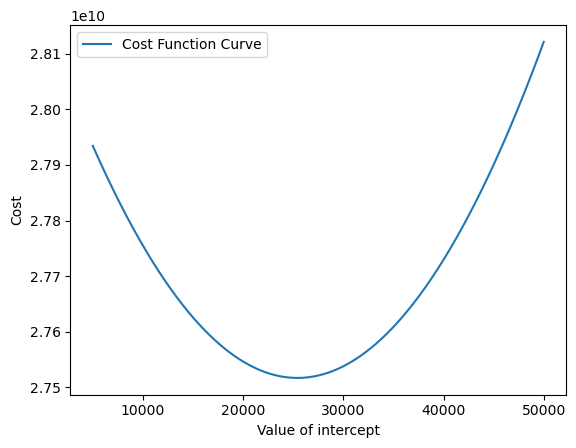

In [137]:
#Plotting the cost values corresponding to every value of beta
plt.plot(Cost_Table.Intercept, Cost_Table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [138]:
new_intercept = Cost_Table['Intercept'][Cost_Table['Cost'] == Cost_Table['Cost'].min()].values
new_intercept[0]

25423